In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Read the dataset csv file and store it into a dataframe called "df"
df = pd.read_csv(r'F:\Data Indra\Project\Project Fraud\Credit Card Payment Fraud Detection\card_transdata.csv')
# use function head() to display first five rows dataset
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
#checking data dimension
df.shape

(1000000, 8)

In [4]:
#check data column and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
#split Data input-output of the dataset
#make function splitInputOutput dataset

def splitInputOutput(data, target_column):
    """
    Function to split input (x) and output (y)

    Parameters
    ----------
    data : pd.DataFrame
        The sample data input

    target_column : str
        The output column name

    Return
    ------
    X : pd.DataFrame
        input data

    y : pd.DataFrame
        output data
    """
    X = data.drop(columns = target_column)
    y = data[target_column]

    # Validate
    print('X shape:', X.shape)
    print('y shape :', y.shape)

    return X, y

# Split input x and output y
X, y = splitInputOutput(data = df, target_column = "fraud")

# Show 5 first rows of input
X.head()


X shape: (1000000, 7)
y shape : (1000000,)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0


In [6]:
# Show 5 first rows of output
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: fraud, dtype: float64

In [7]:
#Validate the Data Dimension
# check data dimension
n_samples, n_features = X.shape

# print number samples and features
print(f"Number of samples  : {n_samples}")
print(f"Number of features : {n_features}")


Number of samples  : 1000000
Number of features : 7


In [8]:
# check data features name
features_names = X.columns

# print name of features
print(f"name of features : {features_names}")

name of features : Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order'],
      dtype='object')


In [9]:
#Split Train, Valid, and Test
#Create a function to split train-valid-test
from sklearn.model_selection import train_test_split

def splitTrainValidTest(X, y, test_size, valid_size, stratify, random_state=42):
    """
    Split data into train & test

    Parameters
    ----------
    X : pd.DataFrame
        The input data

    y : pd.Series
        The output data

    test_size : float
        The proportion of number of test data to total data

    valid_size : float
        The proportion of number of validation data to total data

    stratify : pd.Series
        Reference to stratify the splitting

    random_state : int, default=42
        The random seed, for reproducibility

    Returns
    -------
    X_train : pd.DataFrame
        The input train data

    X_test : pd.DataFrame
        The input test data

    y_train : pd.Series
        The output train data

    y_test : pd.Series
        The output test data
    """
    # Split the data
    X_train, X_not_train, y_train, y_not_train = train_test_split(
        X,
        y,
        test_size = test_size + valid_size,
        stratify = stratify,
        random_state = random_state
    )

    # Then, split valid and test from not_train
    X_valid, X_test, y_valid, y_test = train_test_split(
        X_not_train,
        y_not_train,
        test_size = valid_size/(test_size + valid_size),
        stratify = y_not_train,
        random_state = random_state
    )

    # Validate
    print('X train shape:', X_train.shape)
    print('y train shape:', y_train.shape)
    print('X valid shape :', X_valid.shape)
    print('y valid shape :', y_valid.shape)
    print('X test shape :', X_test.shape)
    print('y test shape :', y_test.shape)

    return X_train, X_valid, X_test, y_train, y_valid, y_test


In [10]:
# Run the code
splitted_data = splitTrainValidTest(
    X = X,
    y = y,
    test_size = 0.2,
    valid_size = 0.2,
    stratify = y,
    random_state = 42
)

X_train, X_valid, X_test, y_train, y_valid, y_test = splitted_data


X train shape: (600000, 7)
y train shape: (600000,)
X valid shape : (200000, 7)
y valid shape : (200000,)
X test shape : (200000, 7)
y test shape : (200000,)


o	test_size = 20% from original data,
o	validation_size = 20% from original data,
o	train_size = 60% from original data

Preprocess Data

In [11]:
#Split numerical and categoric data
# define numerical data
num_col = ['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']

# define categorical
cat_col = ['repeat_retailer','used_chip','used_pin_number','online_order']

# split
X_train_num = X_train[num_col]
X_train_cat = X_train[cat_col]

X_train_cat.head()


,repeat_retailer,used_chip,used_pin_number,online_order
314541,0.0,0.0,0.0,0.0
47553,1.0,0.0,0.0,1.0
738366,0.0,0.0,0.0,1.0
569097,1.0,0.0,0.0,1.0
131210,1.0,0.0,0.0,0.0


In [12]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600000 entries, 314541 to 911151
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   repeat_retailer  600000 non-null  float64
 1   used_chip        600000 non-null  float64
 2   used_pin_number  600000 non-null  float64
 3   online_order     600000 non-null  float64
dtypes: float64(4)
memory usage: 22.9 MB


the data info shown that categorical columns already encoded as numerical (dtype is float64).

In [13]:
# create EDA dataset
eda_df = X_train.copy()

eda_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
314541,0.923874,1.034514,2.123430,0.0,0.0,0.0,0.0
47553,47.643412,6.050101,1.963362,1.0,0.0,0.0,1.0
738366,0.422323,0.280048,0.718345,0.0,0.0,0.0,1.0
569097,4.113173,2.670351,3.685166,1.0,0.0,0.0,1.0
131210,45.904031,6.774806,1.497201,1.0,0.0,0.0,0.0


In [14]:
#Check for the data integrity and potential outliers
# Check min, max and quartile values

eda_df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,26.693168,5.034706,1.826908,0.881307,0.350988,0.100547,0.650873
std,66.503146,27.799233,2.834784,0.323428,0.477280,0.300728,0.476694
min,0.024144,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000
25%,3.878411,0.296040,0.476397,1.000000,0.000000,0.000000,0.000000
50%,9.973288,0.996219,0.998293,1.000000,0.000000,0.000000,1.000000
75%,25.796317,3.347337,2.096242,1.000000,1.000000,0.000000,1.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000


There are some potential extreme values on distance_from_home, distance_from_last_transaction and ratio_to_median_purchase_price

In [15]:
#Check for missing values to handle them if any
eda_df.isna().sum()


distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
dtype: int64

There are no missing values

In [16]:
#identify duplicate rows
duplicateRows = eda_df[eda_df.duplicated()]

#view duplicate rows
duplicateRows

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order


the data has no duplicated value

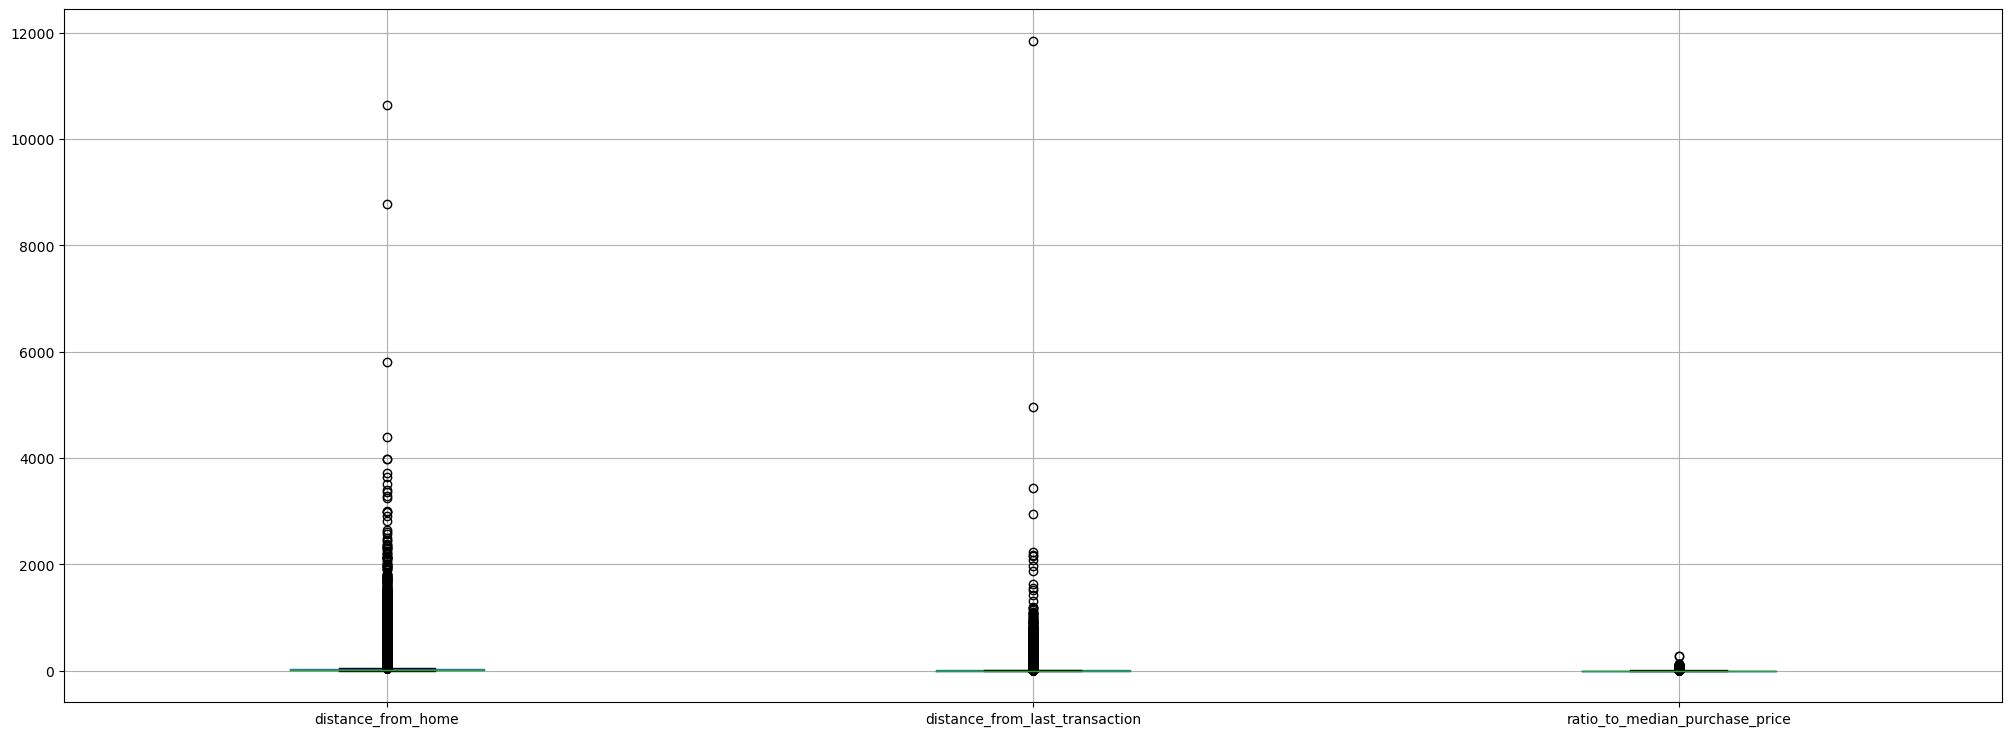

In [17]:
# Visualization numerical outliers with boxplot from matplotlib library
plt.figure(figsize=(25, 9))
X_train_num.boxplot()
plt.show()

there are potential outliers above 4000 for distance_from_home, distance_from_last_transaction


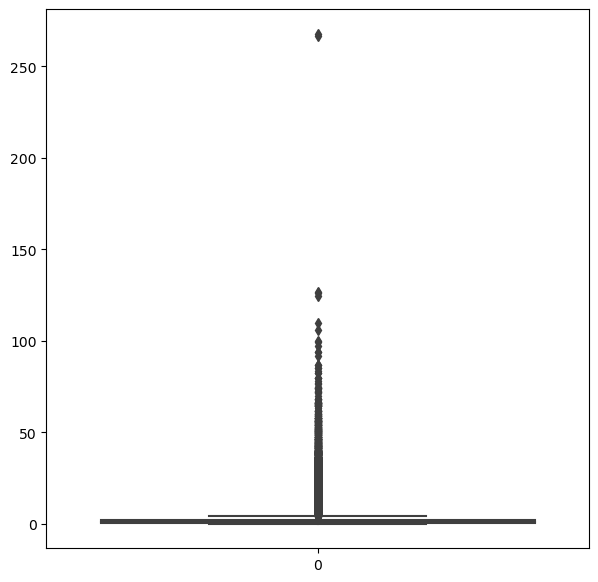

In [18]:
#the ratio_to_median_purchase_price visualize in one chart for the detail
plt.figure(figsize=(7, 7))
sns.boxplot(X_train_num['ratio_to_median_purchase_price'])
plt.show()

the ratio_to_median_purchase_price has potential outliers on above 150 value.

In [19]:
#check the response class of the dataset
#Check proportion of positive class in imbalanced dataset
y_train.value_counts(normalize = True)

0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64

In [20]:
# number of positive class in imbalanced dataset
y_train.value_counts()

0.0    547558
1.0     52442
Name: fraud, dtype: int64

<Axes: xlabel='fraud', ylabel='count'>

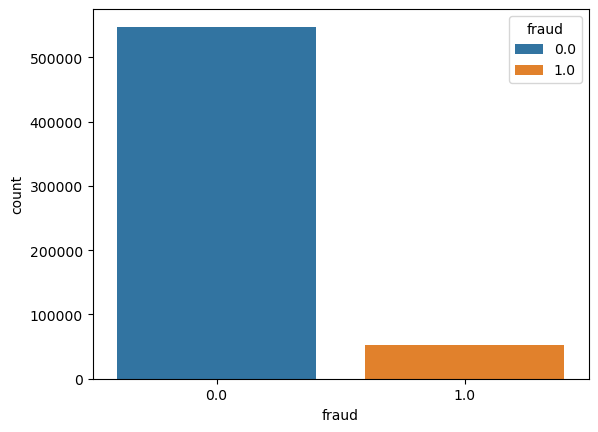

In [21]:
# Visualize the original proportion response class
sns.countplot(x = y_train,
              hue = y_train,
              dodge = False)

the positive class int the dataset is highly imbalance proportion 52442:547558 (0.087403).
it will be balancing using Random Under Sampling Method (RUS) for efficiency reason.

In [22]:
#create Random Under Sampling (RUS) function
def rusFitResample(x, y):

    # Create copy of set data
    x = x.copy()
    y = y.copy()

    # Create sampling object
    rus = RandomUnderSampler(random_state = 42)

    # Balancing data set
    x_rus, y_rus = rus.fit_resample(x, y)

    # Return balanced data set
    return x_rus, y_rus

In [23]:
# Perform RUS
x_rus, y_rus = rusFitResample(x = X_train, y = y_train)

In [24]:
# Check the balanced response
y_rus.value_counts()

0.0    52442
1.0    52442
Name: fraud, dtype: int64

<Axes: xlabel='fraud', ylabel='count'>

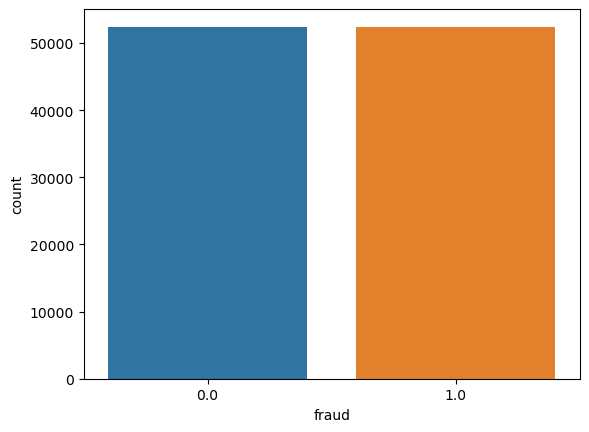

In [25]:
# Visualize the proportion of response categories
sns.countplot(x = y_rus,
              dodge = False)

after using RUS method the dataset has balanced class response proportion 52442:52442

### Create Models on original Dataset (imbalanced dataset)

In [26]:
#Define model & hyperparameter
model_dict = {
    'baseline': DummyClassifier(),
    'logistic regression': LogisticRegression(),
    'decision tree': DecisionTreeClassifier(random_state=42),
    'random forest': RandomForestClassifier(random_state=42)
}

hyperparam_dict = {
    'baseline': {'strategy':['most_frequent']},
    'logistic regression': {},
    'decision tree': {'max_depth': [5, 10, 20]},
    'random forest': {'n_estimators': [100, 300]}
}



In [27]:
#Hyperparameter Tuning
# Perform modeling
models = []
auc_trains = []
auc_tests = []
best_params = []

for model_name in model_dict.keys():
    # Log
    print('start modeling', model_name)

    cv_ = GridSearchCV(estimator = model_dict[model_name],
                       param_grid = hyperparam_dict[model_name],
                       cv = 5,
                       scoring = 'roc_auc',
                       return_train_score = True,
                       verbose = 3)
    cv_.fit(X_train, y_train)

    auc_trains_ = cv_.cv_results_['mean_train_score'][0]
    auc_tests_ = cv_.best_score_
    best_params_ = cv_.best_params_

    # append
    models.append(model_name)
    auc_trains.append(auc_trains_)
    auc_tests.append(auc_tests_)
    best_params.append(best_params_)

    # log
    print('finish modeling', model_name)
    print('')


start modeling baseline
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 2/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 3/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 4/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 5/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
finish modeling baseline

start modeling logistic regression
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\drawy\anaconda3\envs\statistic_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ..............., score=(train=0.967, test=0.968) total time=   3.5s


C:\Users\drawy\anaconda3\envs\statistic_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ..............., score=(train=0.966, test=0.963) total time=   3.6s


C:\Users\drawy\anaconda3\envs\statistic_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ..............., score=(train=0.966, test=0.966) total time=   3.6s


C:\Users\drawy\anaconda3\envs\statistic_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ..............., score=(train=0.966, test=0.966) total time=   3.9s


C:\Users\drawy\anaconda3\envs\statistic_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ..............., score=(train=0.967, test=0.967) total time=   3.8s


C:\Users\drawy\anaconda3\envs\statistic_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


finish modeling logistic regression

start modeling decision tree
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...max_depth=5;, score=(train=1.000, test=1.000) total time=   2.5s
[CV 2/5] END ...max_depth=5;, score=(train=1.000, test=1.000) total time=   1.9s
[CV 3/5] END ...max_depth=5;, score=(train=1.000, test=1.000) total time=   1.9s
[CV 4/5] END ...max_depth=5;, score=(train=1.000, test=1.000) total time=   2.4s
[CV 5/5] END ...max_depth=5;, score=(train=1.000, test=1.000) total time=   1.9s
[CV 1/5] END ..max_depth=10;, score=(train=1.000, test=1.000) total time=   3.0s
[CV 2/5] END ..max_depth=10;, score=(train=1.000, test=1.000) total time=   2.5s
[CV 3/5] END ..max_depth=10;, score=(train=1.000, test=1.000) total time=   2.0s
[CV 4/5] END ..max_depth=10;, score=(train=1.000, test=1.000) total time=   2.8s
[CV 5/5] END ..max_depth=10;, score=(train=1.000, test=1.000) total time=   1.9s
[CV 1/5] END ..max_depth=20;, score=(train=1.000, test=1.000) to

In [29]:
#Best Parameters
summ_exp = pd.DataFrame(
    {'model': models,
     'AUC train': auc_trains,
     'AUC test': auc_tests,
     'Best param': best_params}
)

summ_exp


,model,AUC train,AUC test,Best param
0,baseline,0.500000,0.500000,{'strategy': 'most_frequent'}
1,logistic regression,0.966295,0.966211,{}
2,decision tree,0.999947,0.999891,{'max_depth': 10}
3,random forest,1.000000,1.000000,{'n_estimators': 300}


In [30]:
#Retraining model with best hyperparameters
lr_best = LogisticRegression()
lr_best.fit(X_train, y_train)

dt_best = DecisionTreeClassifier(max_depth = 10)
dt_best.fit(X_train, y_train)

rf_best = RandomForestClassifier(n_estimators = 300)
rf_best.fit(X_train, y_train)


C:\Users\drawy\anaconda3\envs\statistic_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(n_estimators=300)

In [31]:
#Create Models on RUS Dataset (balanced data)
#Define model & hyperparameter
model_dict = {
    'baseline': DummyClassifier(),
    'logistic regression': LogisticRegression(),
    'decision tree': DecisionTreeClassifier(random_state=42),
    'random forest': RandomForestClassifier(random_state=42)
}

hyperparam_dict = {
    'baseline': {'strategy':['most_frequent']},
    'logistic regression': {},
    'decision tree': {'max_depth': [5, 10, 20]},
    'random forest': {'n_estimators': [100, 300]}
}



In [59]:
#Hyperparameter tuning
# Perform modeling
models = []
auc_trains = []
auc_tests = []
best_params = []

for model_name in model_dict.keys():
    # Log
    print('start modeling', model_name)

    cv_ = GridSearchCV(estimator = model_dict[model_name],
                       param_grid = hyperparam_dict[model_name],
                       cv = 5,
                       scoring = 'roc_auc',
                       return_train_score = True,
                       verbose = 3)
    cv_.fit(x_rus, y_rus)

    auc_trains_ = cv_.cv_results_['mean_train_score'][0]
    auc_tests_ = cv_.best_score_
    best_params_ = cv_.best_params_

    # append
    models.append(model_name)
    auc_trains.append(auc_trains_)
    auc_tests.append(auc_tests_)
    best_params.append(best_params_)

    # log
    print('finish modeling', model_name)
    print('')

start modeling baseline
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 2/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 3/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 4/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 5/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
finish modeling baseline

start modeling logistic regression
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\drawy\anaconda3\envs\statistic_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ..............., score=(train=0.978, test=0.979) total time=   0.5s


C:\Users\drawy\anaconda3\envs\statistic_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ..............., score=(train=0.978, test=0.976) total time=   0.5s


C:\Users\drawy\anaconda3\envs\statistic_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ..............., score=(train=0.979, test=0.978) total time=   0.5s
[CV 4/5] END ..............., score=(train=0.979, test=0.978) total time=   0.6s


C:\Users\drawy\anaconda3\envs\statistic_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ..............., score=(train=0.978, test=0.979) total time=   0.6s


C:\Users\drawy\anaconda3\envs\statistic_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


finish modeling logistic regression

start modeling decision tree
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...max_depth=5;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 2/5] END ...max_depth=5;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 3/5] END ...max_depth=5;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END ...max_depth=5;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 5/5] END ...max_depth=5;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 1/5] END ..max_depth=10;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 2/5] END ..max_depth=10;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 3/5] END ..max_depth=10;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 4/5] END ..max_depth=10;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 5/5] END ..max_depth=10;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 1/5] END ..max_depth=20;, score=(train=1.000, test=1.000) to

In [60]:
#Best Parameters
summ_exp = pd.DataFrame(
    {'model': models,
     'AUC train': auc_trains,
     'AUC test': auc_tests,
     'Best param': best_params}
)

summ_exp


,model,AUC train,AUC test,Best param
0,baseline,0.500000,0.500000,{'strategy': 'most_frequent'}
1,logistic regression,0.978265,0.978101,{}
2,decision tree,0.999976,0.999924,{'max_depth': 10}
3,random forest,1.000000,1.000000,{'n_estimators': 300}


In [61]:
#Retraining model with best hyperparameters
dt_best_rus = DecisionTreeClassifier(max_depth = 10)
dt_best_rus.fit(x_rus, y_rus)

lr_best_rus = LogisticRegression()
lr_best_rus.fit(x_rus, y_rus)

rf_best_rus = RandomForestClassifier(n_estimators = 300)
rf_best_rus.fit(x_rus, y_rus)

C:\Users\drawy\anaconda3\envs\statistic_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(n_estimators=300)

## Detection

## Perform Detection Modeling

In [62]:
# Create list of models and training dataset types
model = ["Logistic Regression",
         "Decision Tree", "Random Forest"]

training_set = ["Original","RUS"]

# Create AUC score table using pandas dataframe
auc_valid = pd.DataFrame(index = training_set, columns = model)
auc_valid

,Logistic Regression,Decision Tree,Random Forest
Original,NaN,NaN,NaN
RUS,NaN,NaN,NaN


In [101]:
#Create function auc score
def auc(model, X, y_act):
  # Perform detection and calculate auc score

  y_det = model.predict(X)
  auc_score = roc_auc_score(y_act, y_det)

  return auc_score

### Data AUC of Original Training Set

Logistic Regression

In [102]:
auc_valid.loc["Original", "Logistic Regression"] = auc(lr_best, X_valid, y_valid)
auc_valid

,Logistic Regression,Decision Tree,Random Forest
Original,0.797889,0.999854,0.999886
RUS,0.94018,0.999863,0.999895


Decision Tree

In [103]:
auc_valid.loc["Original", "Decision Tree"] = auc(dt_best, X_valid, y_valid)
auc_valid

,Logistic Regression,Decision Tree,Random Forest
Original,0.797889,0.999854,0.999886
RUS,0.94018,0.999863,0.999895


Random Forest

In [104]:
auc_valid.loc["Original", "Random Forest"] = auc(rf_best, X_valid, y_valid)
auc_valid

,Logistic Regression,Decision Tree,Random Forest
Original,0.797889,0.999854,0.999886
RUS,0.94018,0.999863,0.999895


### Data AUC of RUS Training Set

Logistic Regression

In [84]:
auc_valid.loc["RUS", "Logistic Regression"] = auc(lr_best_rus, X_valid, y_valid)
auc_valid

,Logistic Regression,Decision Tree,Random Forest
Original,0.797889,0.999854,0.999886
RUS,0.94018,0.999863,0.999895


Decision Tree

In [85]:
auc_valid.loc["RUS", "Decision Tree"] = auc(dt_best_rus, X_valid, y_valid)
auc_valid

,Logistic Regression,Decision Tree,Random Forest
Original,0.797889,0.999854,0.999886
RUS,0.94018,0.999863,0.999895


Random Forest

In [86]:
auc_valid.loc["RUS", "Random Forest"] = auc(rf_best_rus, X_valid, y_valid)
auc_valid

,Logistic Regression,Decision Tree,Random Forest
Original,0.797889,0.999854,0.999886
RUS,0.94018,0.999863,0.999895


### Best Model perfomance evaluation

### Best Model on Train Data

In [105]:
y_train_det = rf_best_rus.predict(X_train)
y_train_det

array([0., 0., 0., ..., 0., 0., 0.])

In [106]:
roc = roc_auc_score(y_train, y_train_det)

print('ROC  :', roc)

ROC  : 0.9999397324119088


In [107]:
result  = pd.crosstab(y_train_det,
            y_train,
            margins = True)

In [108]:
result

fraud,0.0,1.0,All
row_0,,,
0.0,547492,0,547492
1.0,66,52442,52508
All,547558,52442,600000


### Best Model on Validation Data

In [109]:
y_val_det = rf_best_rus.predict(X_valid)
y_val_det

array([0., 0., 0., ..., 0., 1., 0.])

In [110]:
roc = roc_auc_score(y_valid, y_val_det)

print('ROC  :', roc)

ROC  : 0.9998946931741951


In [111]:
result  = pd.crosstab(y_val_det,
            y_valid,
            margins = True)

result

fraud,0.0,1.0,All
row_0,,,
0.0,182491,1,182492
1.0,28,17480,17508
All,182519,17481,200000


### Best Model on Testing Data

In [112]:
y_test_det = rf_best_rus.predict(X_test)
y_test_det

array([0., 0., 1., ..., 0., 0., 1.])

In [113]:
roc = roc_auc_score(y_test, y_test_det)

print('ROC  :', roc)

ROC  : 0.9999342537804076


In [114]:
result  = pd.crosstab(y_test_det,
            y_test,
            margins = True)

result

fraud,0.0,1.0,All
row_0,,,
0.0,182496,0,182496
1.0,24,17480,17504
All,182520,17480,200000
